#The Little Book of Deep Learning by François Fleuret

https://fleuret.org/public/lbdl.pdf

These following series of notebooks will consist of my personal code and explanations as I work thorugh the textbook mentioned above.

# Learning From Data

* $ \text{Training Data} =  D = \text{Set} \{(x_i, y_i)\}_{i=1}^N$

* $F$ is the parametric model

* $w$ is the trainable parameter, also called weights.

* $\hat{y} = F(x,w)$ where $\hat{y}$ is the predicted value

* $w \to w^*$ is the process by which we tune or train the paramter $w$ to achieve better outcome predictions

* $Λ(w)$ is the Loss function by which we essentially assess when our parametric model, $F$, is good enough or not. The smaller the valus of $Λ(w)$, the better our model $F$.

# Basis Function Regression

Suppose we have that our paramteric model is a very basic linear combination of some pre-defined basis of functions say; $(f_1,...,f_K)$ and respectively with weights $(w_1,...,w_K)$. Defined as:
$$
F(x,w) = \sum_{i=1}^{K} w_i \cdot f_i
$$

Most common loss function is the ***Mean Squared Error***. Defined as:
$$
Λ(w) = \frac{1}{N}\sum_{i=1}^{N} (y_i - F(x_i, w))^2
$$

Now observe that since our paramteric model $F$ is linear with respect to $w_i$'s and on the other hand the loss function $Λ$ is quadratic with respect to $F$, thus $Λ$ is also quadratic with respect to $w_i$'s as well, hence trying to minimize the loss function or find better weights $w^*$, it simplifies to solving a linear system.

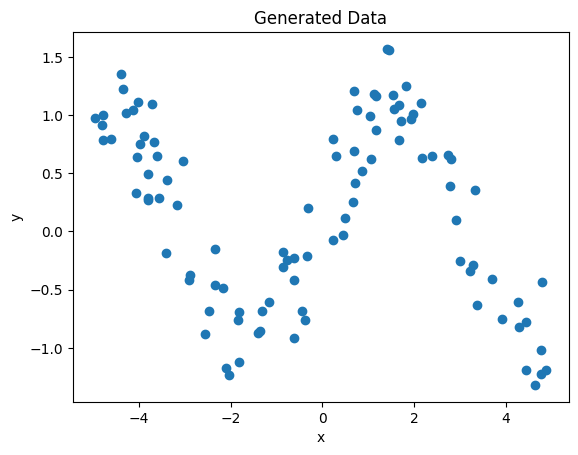

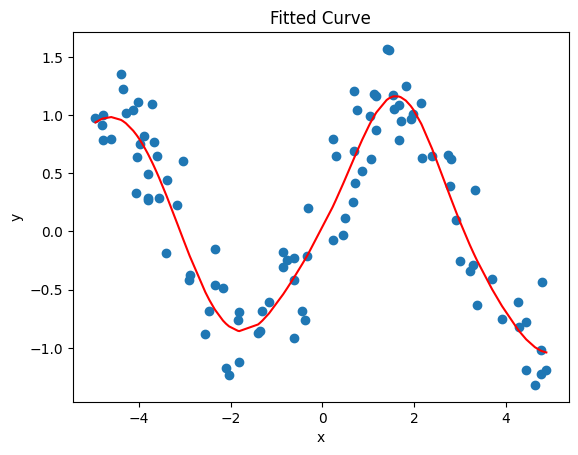

In [1]:
#Below we try to implement the above discussion in some rudimentry code
import numpy as np
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(0)

# Number of data points
N = 100

# Generate some random data
x = np.random.uniform(-5, 5, N)
y = np.sin(x) + np.random.normal(0, 0.3, N)

# Plot the data
plt.scatter(x, y)
plt.title("Generated Data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Define the number of basis functions to use
num_basis_functions = 10

# Define the mean and standard deviation of the Gaussian basis functions
means = np.linspace(-5, 5, num_basis_functions)
std_dev = 1.0

# Define the Gaussian basis functions
def gaussian_basis(x, mu, sigma):
    return np.exp(-(x - mu)**2 / (2 * sigma**2))

# Calculate the design matrix
X = np.empty((N, num_basis_functions))
for i in range(num_basis_functions):
    X[:, i] = gaussian_basis(x, means[i], std_dev)

# Calculate the weights using the normal equation
weights = np.linalg.inv(X.T @ X) @ X.T @ y

# Calculate the predictions
y_pred = X @ weights

# Plot the data and the fitted curve
plt.scatter(x, y)
plt.plot(np.sort(x), y_pred[np.argsort(x)], color='red')
plt.title("Fitted Curve")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


# Under and Overfitting

# Categories of models